In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
from PIL import Image

def int_to_bin(num):
    binary = bin(num)[2:]
    return "0"*(8-len(binary))+binary

def bin_to_int(binary):
    return int(binary, 2)

def encode_image(image_path, message):
    img = Image.open(image_path).convert("RGB")
    width, height = img.size

    message_bin = ''.join([int_to_bin(ord(c)) for c in message])

    if len(message_bin) > width * height * 3:
        raise ValueError("Message is to long")

    data = img.load()
    index = 0
    for x in range(width):
        for y in range(height):
            r, g, b = data[x, y]
            if index < len(message_bin):
                r = (r & 254) | int(message_bin[index])
                index += 1
            if index < len(message_bin):
                g = (g & 254) | int(message_bin[index])
                index += 1
            if index < len(message_bin):
                b = (b & 254) | int(message_bin[index])
                index += 1
            data[x, y] = (r, g, b)
    img.save("encoded_"+image_path)
    return data

def decode_image(image_path, length):
    img = Image.open(image_path).convert("RGB")
    width, height = img.size

    data = img.load()
    message_bits = ""
    l = 0
    for x in range(width):
        for y in range(height):
            r, g, b = data[x, y]
            if l > length:
              break
            l += 1
            message_bits += str(r & 1)
            message_bits += str(g & 1)
            message_bits += str(b & 1)
    message = ""
    for i in range(0, len(message_bits), 8):
        message += chr(bin_to_int(message_bits[i:i+8]))
    
    return message

Decoded message: Bardzo tajna, ukryta informacja$ 


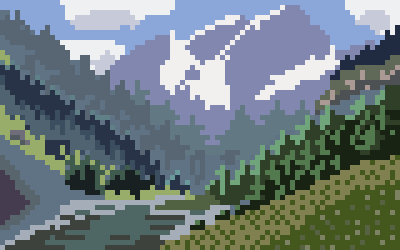

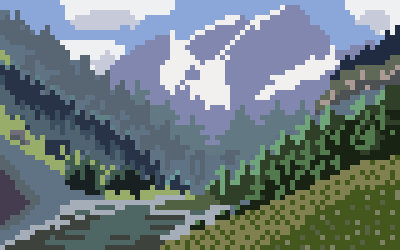

In [4]:
en = 'image.png'
de = 'encoded_image.png'
encoded = encode_image(en, "Bardzo tajna, ukryta informacja")
decoded_msg = decode_image(de, 90)

print(f'Decoded message: {decoded_msg}')


pil_img = Image.open(en).convert("RGB")
display(pil_img)

pil_img = Image.open(de).convert("RGB")
display(pil_img)